In [55]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [8]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [13]:
df = df.drop(['CustomerID'], axis=1)

In [14]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13ae7ac8>,
      dtype=object)

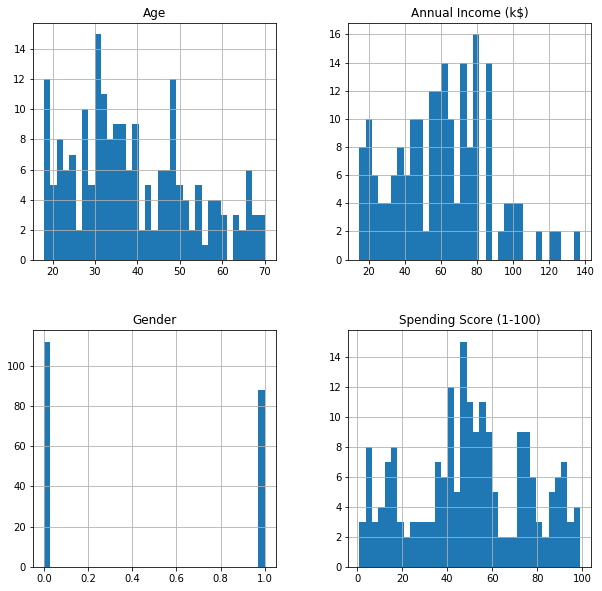

In [20]:
df.hist(figsize=(10, 10), bins=35)

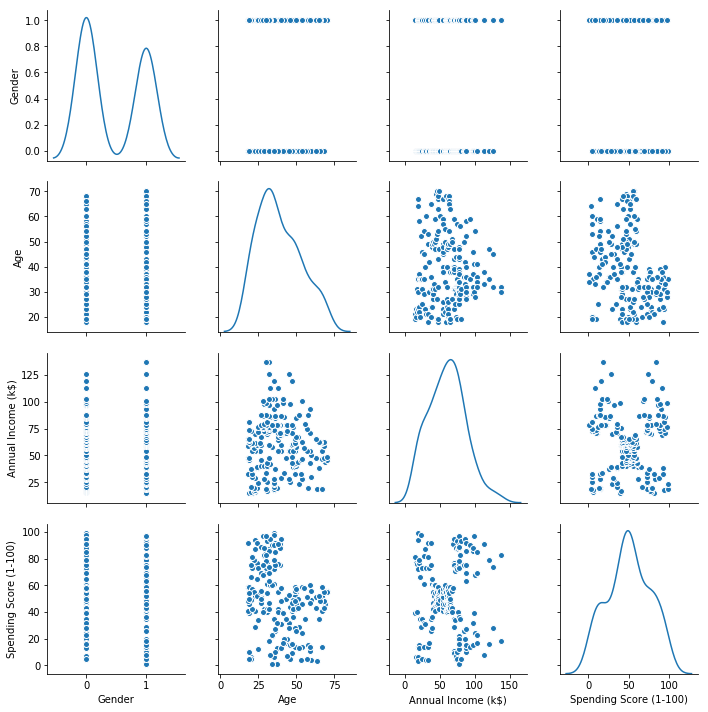

In [33]:
sns.pairplot(df, diag_kind="kde")

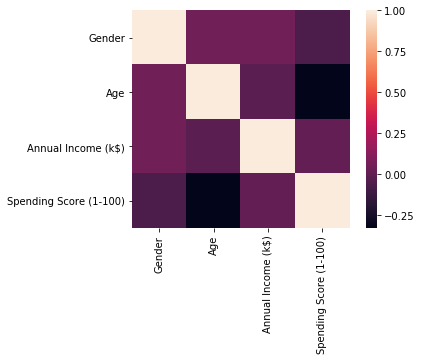

In [35]:
sns.heatmap(df.corr(), square=True)

In [56]:
tsne = TSNE(random_state=2019)
tsne_representation = tsne.fit_transform(df)

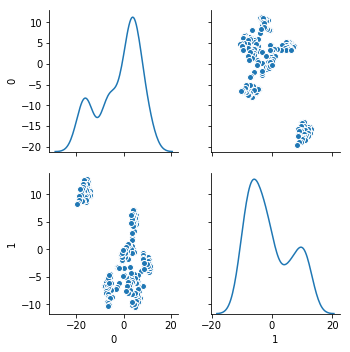

In [63]:
tsne_representation = pd.DataFrame(tsne_representation)
sns.pairplot(tsne_representation, diag_kind="kde")

In [165]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=5).fit(tsne_representation)

In [166]:
lbl = clustering.labels_
lbl = pd.DataFrame(lbl)

In [167]:
df_transformed = tsne_representation.merge(lbl, how='left', left_index=True, right_index=True)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


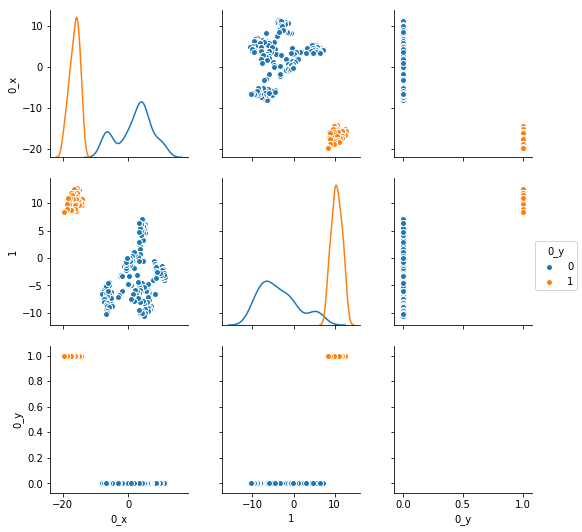

In [168]:
sns.pairplot(df_transformed, hue="0_y", diag_kind="kde")

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


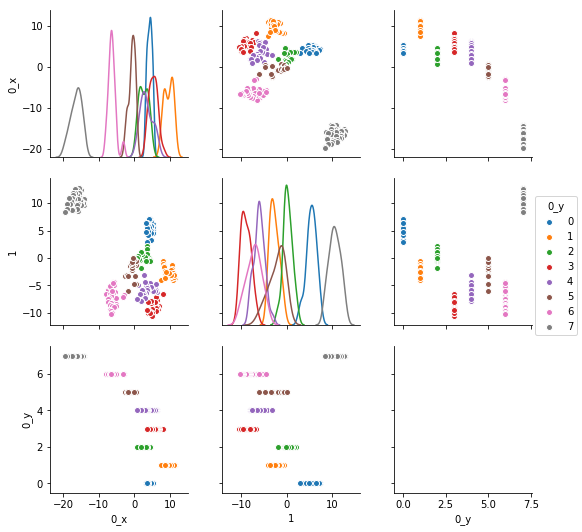

In [169]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(tsne_representation)
lbl = clustering.labels_
lbl = pd.DataFrame(lbl)
df_transformed = tsne_representation.merge(lbl, how='left', left_index=True, right_index=True)
sns.pairplot(df_transformed, hue="0_y", diag_kind="kde")

дальше классы возьми метками и сделай обучкение с учителем, получи фича импортансез и бинго
